<a href="https://colab.research.google.com/github/PrathameshMore777/LendingClubCaseStudy/blob/LendingCCS-1.0/LendingClubCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing Required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [7]:
from platform import python_version
print("python",python_version())
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))
#print('matplotlib: {}'.format(matplotlib.__version__))

python 3.8.16
pandas 1.3.5
numpy 1.21.6
seaborn 0.11.2
matplotlib 3.2.2
plotly 5.5.0


In [8]:
#Loading Data
loan_data = pd.read_csv('/home/loan.csv')
loan_dd = pd.read_excel('/home/Data_Dictionary.xlsx')

In [71]:
#Display limit removed for dataframe and configured style for seaonrn
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [10]:
# Data_Dictionary.xlsx 5 rows output
loan_dd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [11]:
# Loan.csv 5 rows output
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
#Data info for first step exploring
print('Total No.of Columns:',loan_data.shape[1])
print('Total No.of Rows:',loan_data.shape[0])
print('Total No.of Missing Values:',loan_data.isnull().sum().sum())
print('Total No.of Unique Values:',loan_data.nunique().sum())
print('Total No.of Duplicates:',loan_data.duplicated().sum())

Total No.of Columns: 111
Total No.of Rows: 39717
Total No.of Missing Values: 2263364
Total No.of Unique Values: 416801
Total No.of Duplicates: 0


In [13]:
# Dataframe Info
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [14]:
# Column Datatype Info
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [15]:
# Dataframe description for Data Cleaning reference
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [16]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [17]:
# Missing Values Details
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [18]:
# Calculating % in which column there is large amount of null/missing values values
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [19]:
#Before Deletion of Columns
print(loan_data.shape)

(39717, 111)


In [20]:
# Deleting Columns where null values are morethan 50%
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Post Deletion of Columns
print(loan_data.shape)

(39717, 54)


In [21]:
# Recheck for the null values if we removed more than 50% or not
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [22]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [23]:
# Now check for missing values in rows
print((loan_data.isnull().sum(axis=1)).max())

6


In [24]:
#Before removing irrelevant columns
print(loan_data.shape)

(39717, 54)


In [25]:
#Getting rid of columns which are not relevant for loan defaulters.
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
loan_data=loan_data.drop(['title','emp_title','desc','url','zip_code','member_id','funded_amnt_inv'],axis=1)
#Post removing irrelevant columns
print(loan_data.shape)

(39717, 26)


In [26]:
#Find for unique values count in columns and delete the columns with less no so it will not impact the analysis
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [27]:
#Before removing min unique values
print(loan_data.shape)

(39717, 26)


In [28]:
# Deleting columns with 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
#After removing min unique values
print(loan_data.shape)

(39717, 18)


In [29]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [30]:
#if possible Remove/Fix null values of the columns with respective to objective of analysis
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [31]:
#emp_length can be removed/fixed as it hold the null values.
print(loan_data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [32]:
#pub_rec_bankruptcies can be removed/fixed as it hold the null values.
print(loan_data.pub_rec_bankruptcies.value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [33]:
# Before deleting null values from emp_length
print(loan_data.shape)

(39717, 18)


In [34]:
#Removing the null values from emp_length will not have much impact so we will delete the null values from column
loan_data = loan_data.dropna(subset=['emp_length'])
# After deleting null values from emp_length
print(loan_data.shape)

(38642, 18)


In [35]:
#for pub_rec_bankruptcies column we can replace the null values with 0
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [36]:
#Check missing/null values from dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [37]:
print(loan_data.shape)

(38642, 18)


In [38]:
# before removing duplicate rows
print(loan_data.shape)

(38642, 18)


In [39]:
#Remove duplicate rows from columns
loan_data = loan_data.drop_duplicates()
# After removing duplicate rows
print(loan_data.shape)

(38642, 18)


In [40]:
#Dataframe Info
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [41]:
#Fixing datatype and format in dataframe column
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['year_issued']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['month_issued']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [42]:
# decimal limit
for p in loan_data.columns:
    if(loan_data[p].dtype=='float64'):
      loan_data[p]=loan_data[p].round(2)
      
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,year_issued,month_issued
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


In [43]:
#filtering values where loan_status is not current as we need to check for cust which will default
loan_data = loan_data[loan_data.loan_status!='Current']
#after deleting current status values from loan_status columns
print(loan_data.shape)

(37544, 20)


In [44]:
#Segregate columns as per categorical and numerical
category_column = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
numerical_column =['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_column=['id']
status_column=['loan_status']

In [45]:
#Remove outliers
px.box(loan_data,x='loan_amnt',width=550,height=250,title='Loan Amount',labels={'loan_amnt':'Loan_Amount'}).show()
px.box(loan_data,x='int_rate',width=550,height=250,title='Interest Rate',labels={'int_rate':'Interest_Rate'}).show()
px.box(loan_data,x='annual_inc',width=550,height=250,title='Borrowers Annual Income',labels={'annual_inc':'Annual_Income'}).show()
px.box(loan_data,x='dti',width=550,height=250,title='Debt To Income Ratio',labels={'dti':'DTI_Ratio'}).show()
px.line(sorted(loan_data.annual_inc),width=550,height=250,title='Annual Income Trend',labels={'value':'Annual_Income','index':'Position'}).show()


In [46]:
#As per observation the annual income trend is growing exponentialy so we will remove the values greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

In [47]:
px.line(sorted(loan_data.annual_inc),width=550,height=250,title='Annual Income Trend',labels={'value':'Annual_Income','index':'Position'}).show()

**The Data has been filtered cleaned at this stage**

**Univariate analysis**

In [49]:
loan_data["loan_status"].value_counts()

Fully Paid     31813
Charged Off     5360
Name: loan_status, dtype: int64

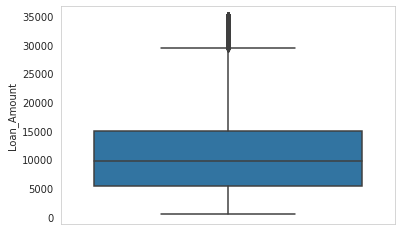

In [51]:
sns.boxplot( y=loan_data["loan_amnt"] )
plt.ylabel('Loan_Amount')
plt.show()

**Observatio :** Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

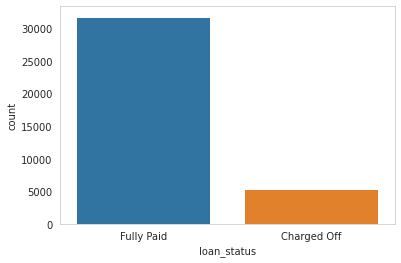

In [53]:
sns.countplot(x= loan_data["loan_status"])
plt.show()

In [54]:
loan_data["loan_status"].value_counts()

Fully Paid     31813
Charged Off     5360
Name: loan_status, dtype: int64

**Conclusion :** Most of the loans are Fully Paid and About 14% of loan are having status as defaulters hence we have a class imbalance here.

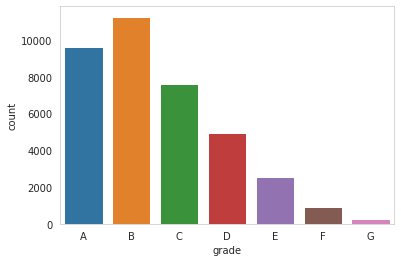

In [55]:
sns.countplot(x='grade', data=loan_data)
plt.show()

**Conclusion:** Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

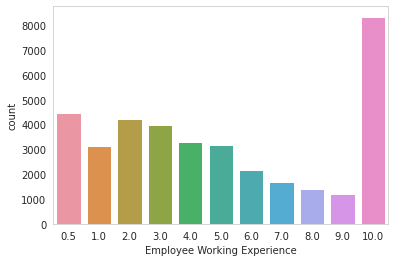

In [59]:
sns.countplot(x='emp_length', data=loan_data)
plt.xlabel('Employee Working Experience')
plt.show()

**Conclusion:** Majority of employees applying for the loan have more than 10 years of experience

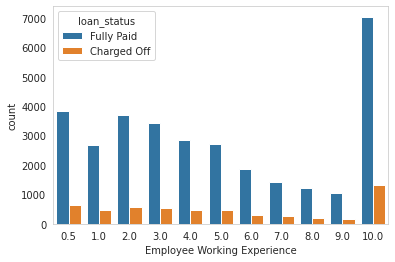

In [64]:
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.xlabel('Employee Working Experience')
plt.show()


**Conclusion:** Employee with 10 years of experience on an avergae are the one who paid the loan fully and also charged of so need to check this category before giving loans

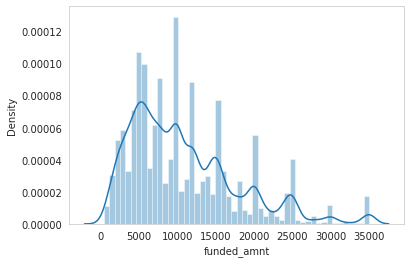

In [65]:
sns.distplot(loan_data['funded_amnt'])
plt.show()

**Conclusion:** Funded amount is left skewed. Most of the loan amount given is 5 lakhs

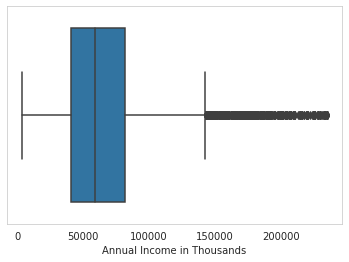

In [74]:
sns.boxplot(x=loan_data['annual_inc'])
plt.xlabel('Annual Income in Thousands')
plt.show()

**Conclusion:** Most of the applicants have Annualincome between 50K and 70K

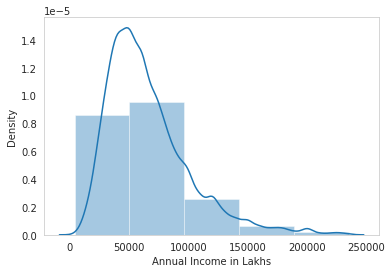

In [81]:
sns.distplot(loan_data[loan_data['annual_inc'] > 3000]['annual_inc'], bins=5)
plt.xlabel('Annual Income in Thousand')
plt.show()

**Conclusion:** Majority of loan applicants have income less than 5 lakhs

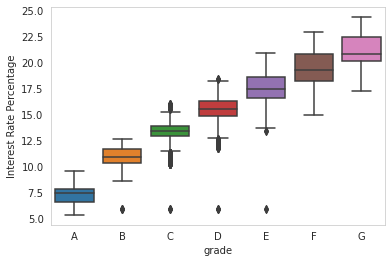

In [85]:
sns.boxplot(y='int_rate', x='grade', data=loan_data)
plt.ylabel('Interest Rate Percentage')
plt.show()

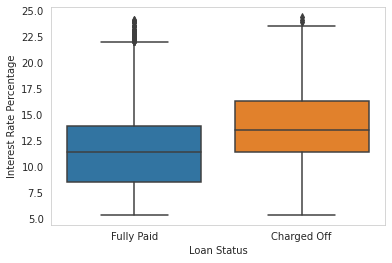

In [86]:
sns.boxplot(y='int_rate', x='loan_status', data=loan_data)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

**Conclusion:** Grade A applicants have less interest rates as compared to G grade applicants and mostly high interest rate are charged-of/defaulted

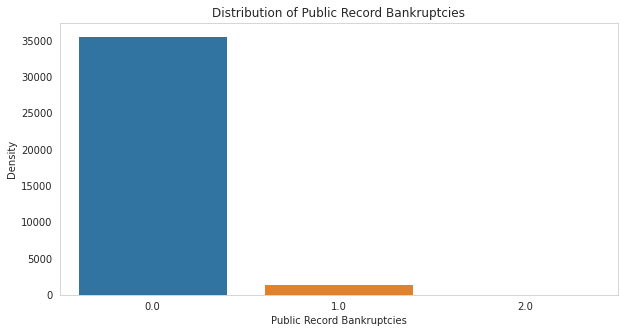

In [118]:
# pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

**Conclusion:** Majority of the borrowers have no record of Public Recorded Bankruptcy.

**Segmented Univariate Analysis**

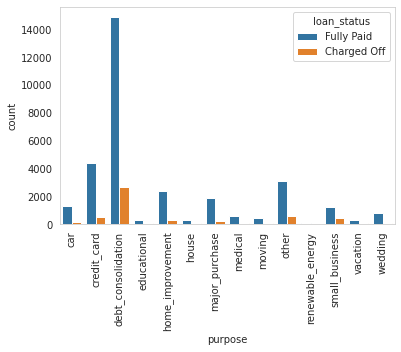

In [87]:
sns.countplot(x='purpose', hue="loan_status", data=loan_data)
plt.xticks(rotation=90)
plt.show()

**Conclusion:** Majority of loan has been given for the debt_consolidation purpose and has been fully paid.

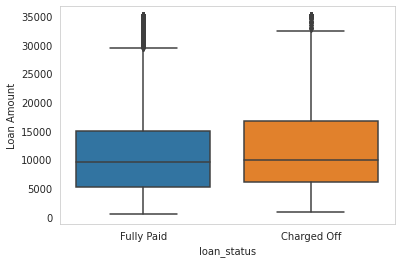

In [88]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_data)
plt.ylabel('Loan Amount')
plt.show()

**Conclusion:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

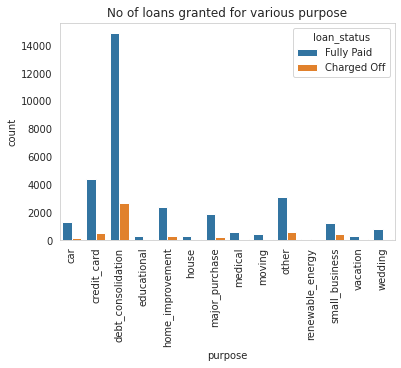

In [90]:
sns.countplot(x='purpose', hue='loan_status', data=loan_data)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

**Conclusion:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

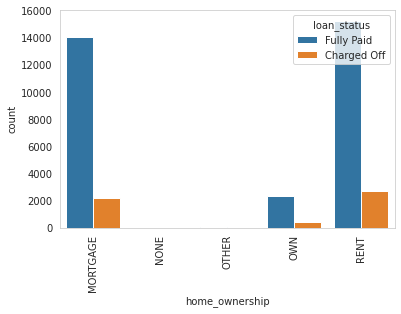

In [91]:
sns.countplot(x='home_ownership',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.show()

**Conclusion:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

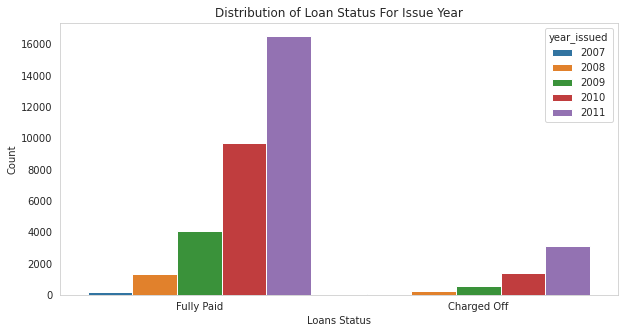

In [97]:
# loan_status based on year issued
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='year_issued')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

**Conclusion:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

**Bivariate Analysis**

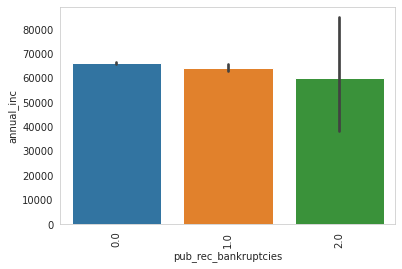

In [92]:
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_data)
plt.xticks(rotation=90)
plt.show()

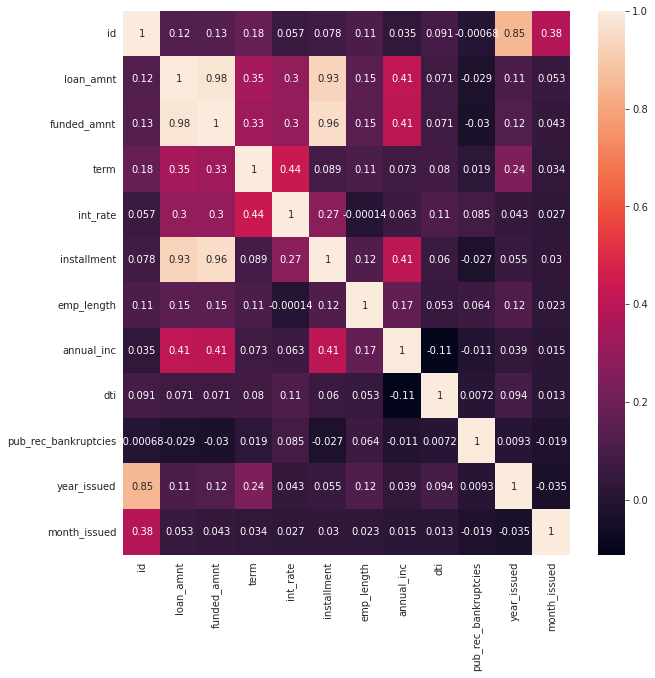

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

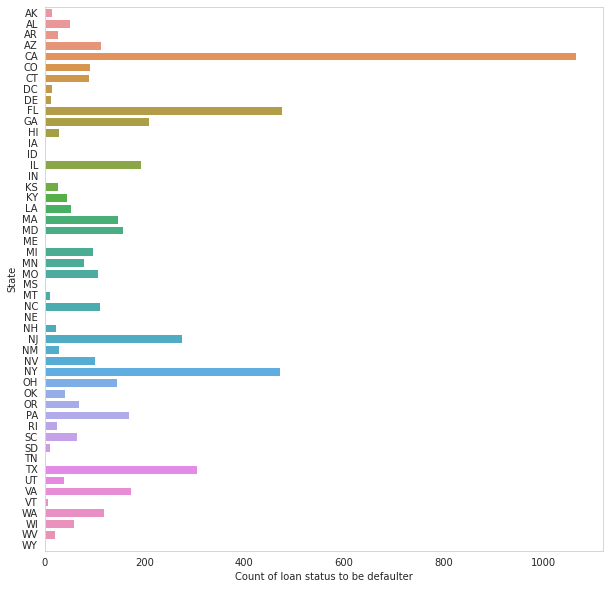

In [101]:
g = loan_data[loan_data['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**Conclusion:** Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

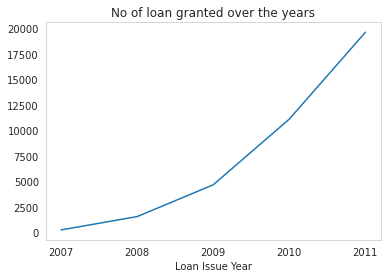

In [102]:
g = loan_data.groupby('year_issued')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Conclusion:** Loan Applicants have been increasing exponentially from year 2007 to 2011

In [113]:
loan_data_agg = loan_data[loan_data['funded_amnt'] <= 1000000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

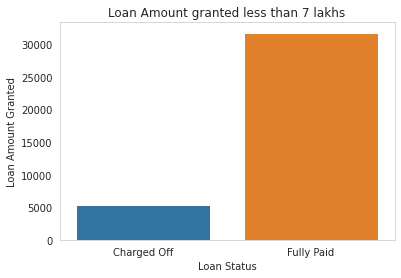

In [114]:
sns.barplot(x='loan_status', y='funded_amnt', data=loan_data_agg)
plt.title('Loan Amount granted less than 10 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [115]:
loan_data_agg = loan_data[loan_data['funded_amnt'] > 1000000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

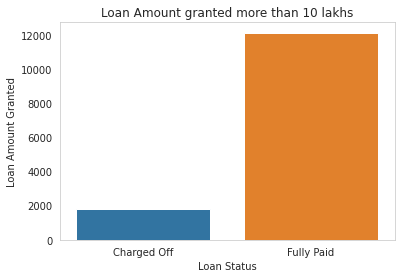

In [116]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 10 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

**Conclusion:** Loan Amount doesnt make anychange in defaulter prediction analysis

<Figure size 720x360 with 0 Axes>

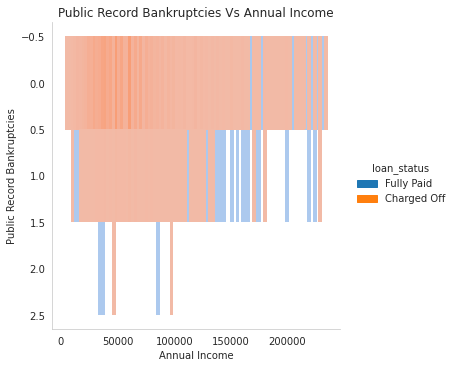

In [117]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

**Analysis for LendingClubCaseStudy:**


*   The Defaulted loan are lower for the borrowers which own their property compared to mortgage or rent.
*   The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
*   The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
*   Low grade loans have high tendency to default. Grading system is working as expected.
*   Extra scrutiny must be done for the applicants belonging to CA state, as tendency to default is high.
*   The default loan amount increases with interest rate and shows are decline after 17.5% interest rate.
*   Loans having higher interest rate have more defaulters. Check the background of applicant thoroughly if interest rate is high.
*   Risk are with the Borrowers having Public Recorded Bankruptcy.
*   The Grade represent risk factor thus we can say interest rate increases with the risk.
*   When the purpose is debt consolidation check applicant thoroughly as it has high tendency to default.







